/usr/local/lib/python3.9/site-packages/scipy/optimize/optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/usr/local/lib/python3.9/site-packages/scipy/optimize/optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


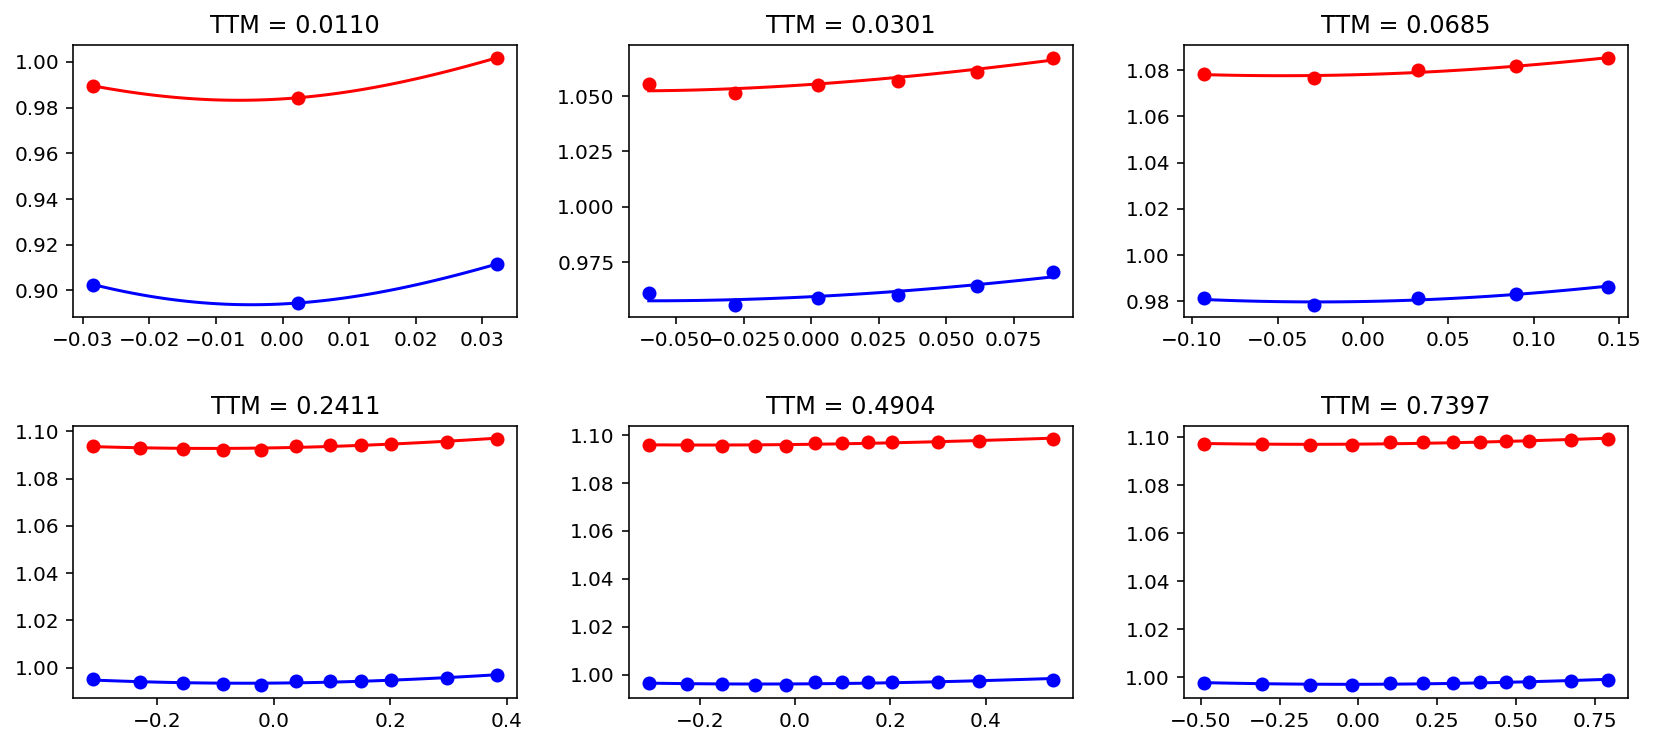

In [66]:
from qfin.models import *
from qfin.volsurf.filters import *
from datetime import datetime

model = VarianceGammaModel()
market_vs = VolatilitySurface.from_date(datetime(2019, 4, 1), filters=[filter_delta(0.1)])
model_vs = model.vs([0.01, 1, -0.6], market_vs.points)
model_vs.calibrate()

fig = model_vs.plot()

model_vs2 = model.vs([0.01, 1.1, -0.6], market_vs.points)
model_vs2.calibrate()
_ = model_vs2.plot(fig=fig)

In [ ]:
df = np.round(df, 2)

In [37]:
pd.to_datetime(df1['date'], format='%Y%m%d')

0     2019-04-29
1     2019-04-01
2     2019-04-02
3     2019-05-07
4     2019-05-06
         ...    
453   2020-07-01
454   2020-06-29
455   2020-06-28
456   2020-06-27
457   2020-06-30
Name: date, Length: 458, dtype: datetime64[ns]

In [38]:
df1 = pd.read_csv(f"_output/calibration/results/20210227_195345/HESTON/parameters.csv")
df1['date'] = pd.to_datetime(df1['date'], format='%Y%m%d')
df1 = df1.set_index('date')
df1

,cost,rmse,penalty,KAPPA,RHO,V0,VBAR,XI
date,,,,,,,,
2019-04-29,0.022914,0.012932,0.009982,2.865635,0.220362,0.350852,0.425383,0.990252
2019-04-01,0.019896,0.016349,0.003547,1.773046,0.091507,0.182648,0.535237,0.000010
2019-04-02,0.051069,0.048980,0.002089,0.961751,-0.059229,0.410384,0.166459,0.965800
2019-05-07,0.022570,0.021343,0.001227,0.110715,0.093010,0.433153,0.461890,0.852617
2019-05-06,0.014512,0.013651,0.000861,0.184798,0.070496,0.417848,0.322490,0.706287
...,...,...,...,...,...,...,...,...
2020-07-01,0.030209,0.024575,0.005634,2.053301,-0.032581,0.194215,1.060648,0.494731
2020-06-29,0.032979,0.026342,0.006637,2.338848,-0.067058,0.196829,0.995671,0.302287
2020-06-28,0.033655,0.028418,0.005237,1.935076,-0.113356,0.223491,1.069693,0.412282


In [44]:
np.corrcoef(df1['RHO'], df2['THETA'])

array([[1.       , 0.1546898],
       [0.1546898, 1.       ]])

<AxesSubplot:label='3646055b-e484-4ac0-8515-211fdba87b85', xlabel='date'>

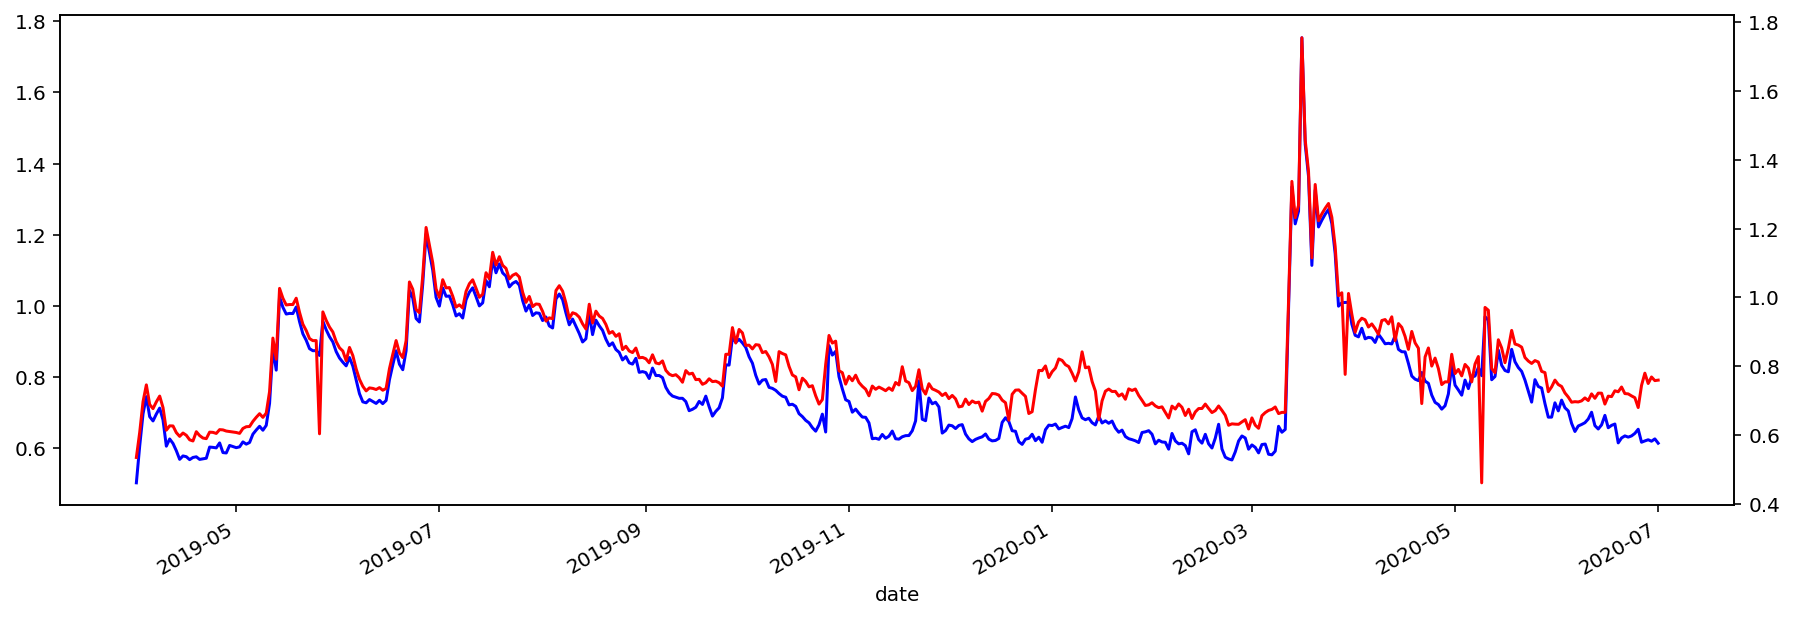

In [47]:
fig, ax = plt.subplots(figsize=(15, 5))

df1 = pd.read_csv(f"_output/calibration/results/20210227_195345/BLACK_SCHOLES/parameters.csv")
df1['date'] = pd.to_datetime(df1['date'], format='%Y%m%d')
df1 = df1.set_index('date')
df1['SIGMA'].plot(ax=ax, c='b')

df2 = pd.read_csv(f"_output/calibration/results/20210227_195345/VARIANCE_GAMMA/parameters.csv")
df2['date'] = pd.to_datetime(df2['date'], format='%Y%m%d')
df2 = df2.set_index('date')
df2['SIGMA'].plot(ax=ax.twinx(), c='r')

<AxesSubplot:label='eaa9503b-255e-4377-8410-4de5a9a06a5b', xlabel='date'>

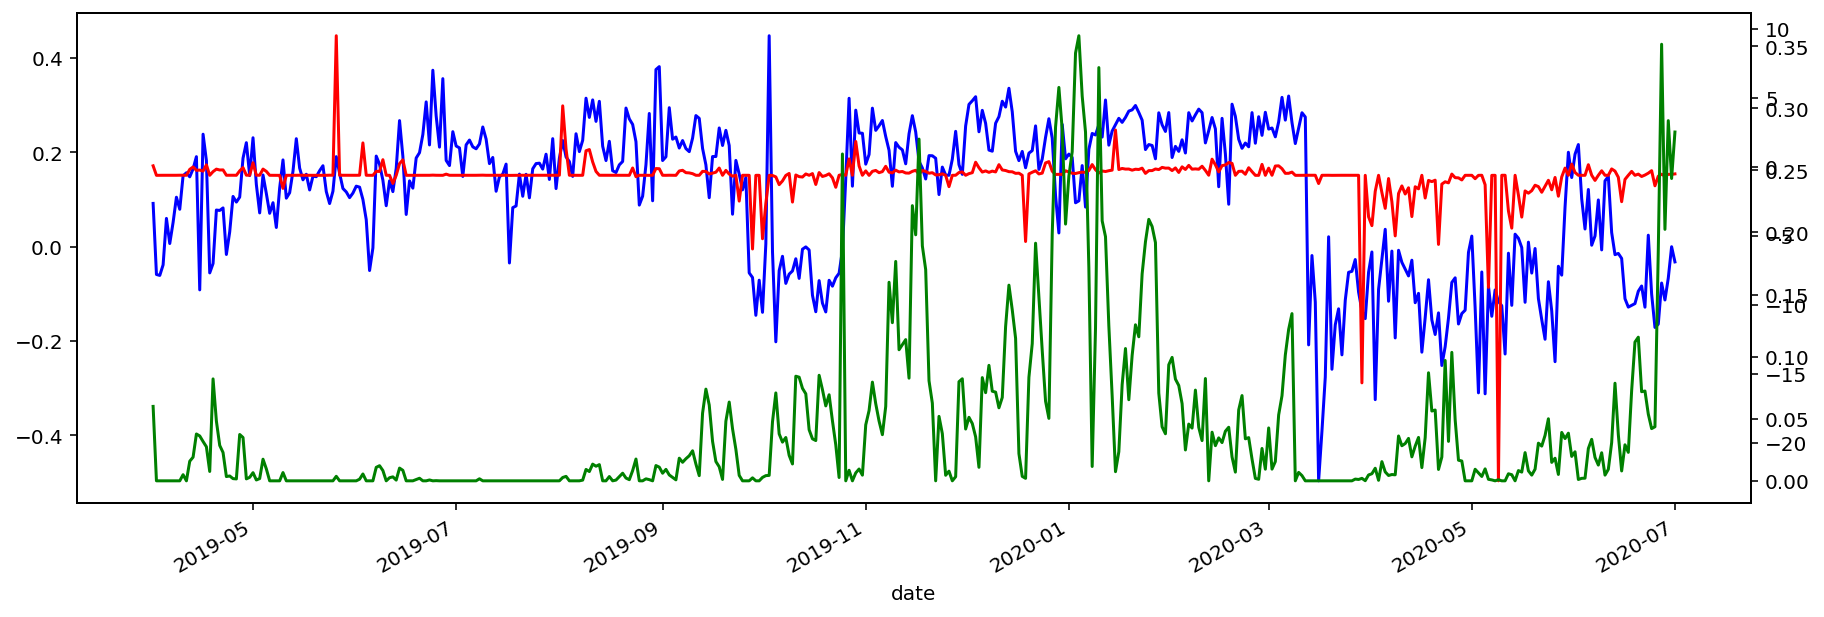

In [46]:
fig, ax = plt.subplots(figsize=(15, 5))

df1 = pd.read_csv(f"_output/calibration/results/20210227_195345/HESTON/parameters.csv")
df1['date'] = pd.to_datetime(df1['date'], format='%Y%m%d')
df1 = df1.set_index('date')
df1['RHO'].plot(ax=ax, c='b')

df2 = pd.read_csv(f"_output/calibration/results/20210227_195345/VARIANCE_GAMMA/parameters.csv")
df2['date'] = pd.to_datetime(df2['date'], format='%Y%m%d')
df2 = df2.set_index('date')
df2['THETA'].plot(ax=ax.twinx(), c='r')

<AxesSubplot:label='44972d35-fdc1-43ed-bf4d-9f318370e11a', xlabel='date'>

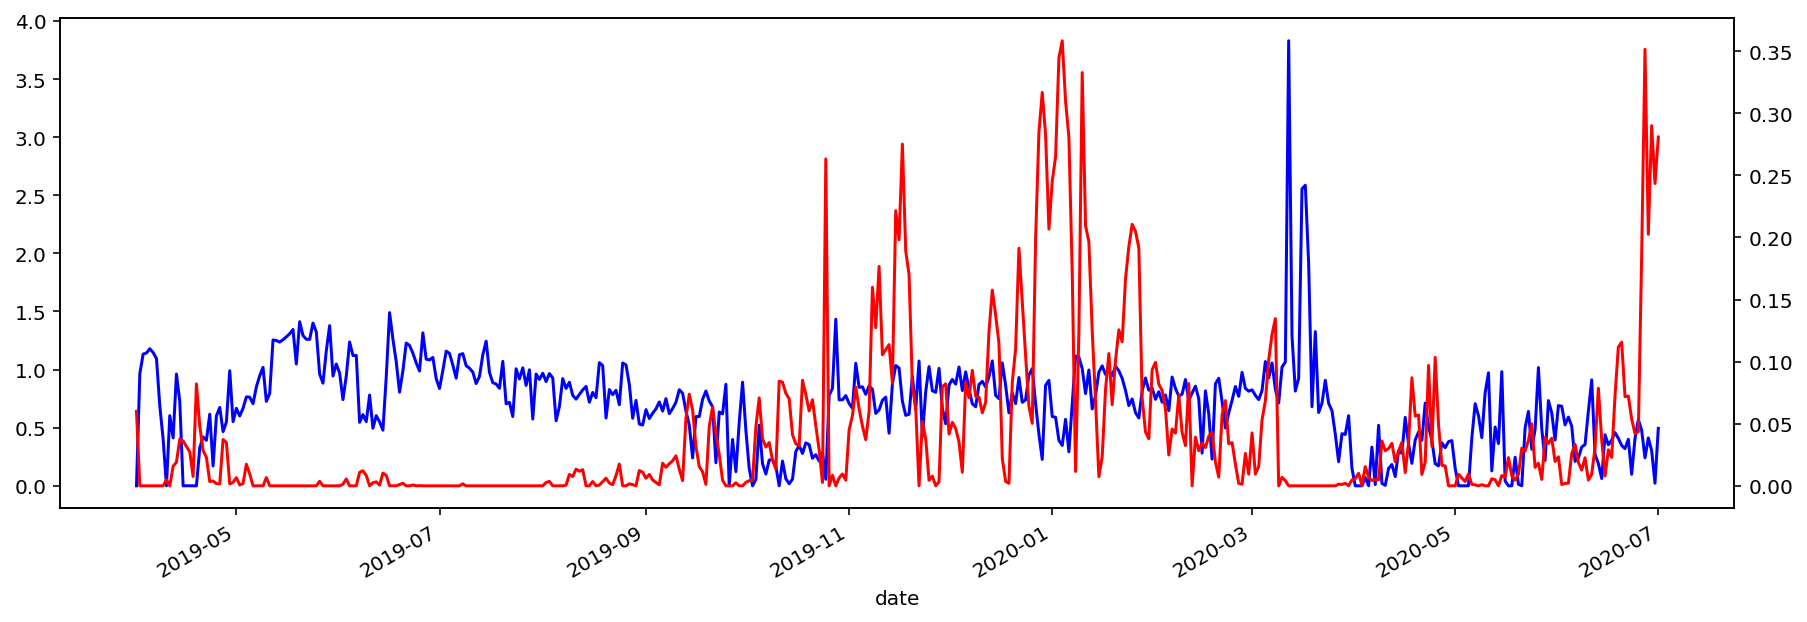

In [48]:
fig, ax = plt.subplots(figsize=(15, 5))

df1 = pd.read_csv(f"_output/calibration/results/20210227_195345/HESTON/parameters.csv")
df1['date'] = pd.to_datetime(df1['date'], format='%Y%m%d')
df1 = df1.set_index('date')
df1['XI'].plot(ax=ax, c='b')

df2 = pd.read_csv(f"_output/calibration/results/20210227_195345/VARIANCE_GAMMA/parameters.csv")
df2['date'] = pd.to_datetime(df2['date'], format='%Y%m%d')
df2 = df2.set_index('date')
df2['NU'].plot(ax=ax.twinx(), c='r')

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

from datetime import datetime
import re
import os
import pandas as pd
from scipy.interpolate import *
from scipy.optimize import minimize, newton, NonlinearConstraint

from qfin.volsurf import VolatilitySurface, filter_delta, filter_volume
from qfin.utils import bs_explicit_call, bs_iv
from qfin.volsurf.filters import *

# Load volatility surface and plot SVI fits

In [3]:
date = datetime(2019, 4, 1)
datetime.strftime(date, '%Y%m%d')

'20190401'

/usr/local/lib/python3.9/site-packages/scipy/optimize/optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/usr/local/lib/python3.9/site-packages/scipy/optimize/zeros.py:459: RuntimeWarning: some failed to converge after 50 iterations
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.9/site-packages/scipy/optimize/optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/usr/local/lib/python3.9/site-packages/scipy/optimize/zeros.py:459: RuntimeWarning: some failed to converge after 50 iterations
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.9/site-packages/scipy/optimize/optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/usr

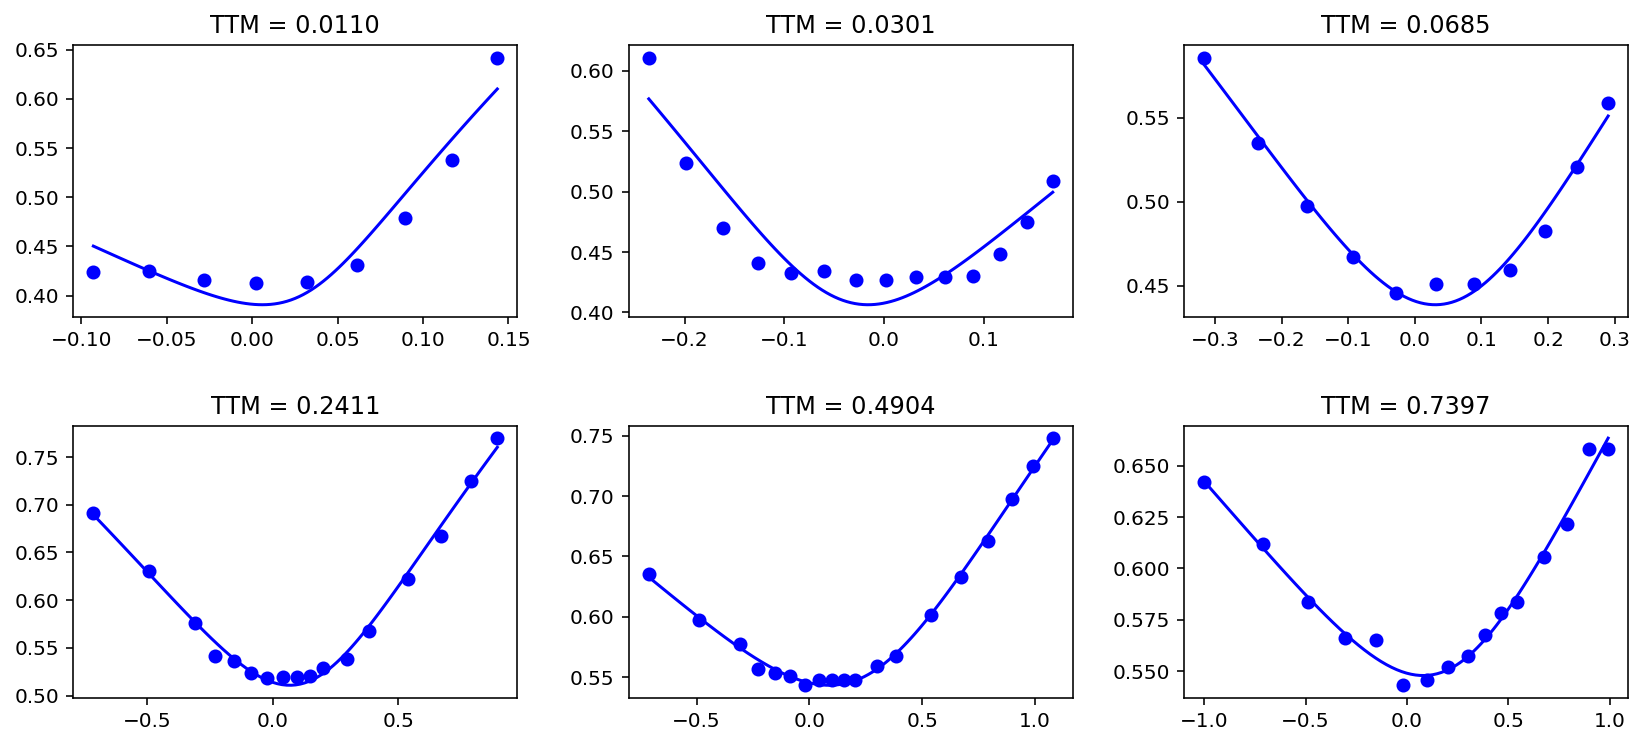

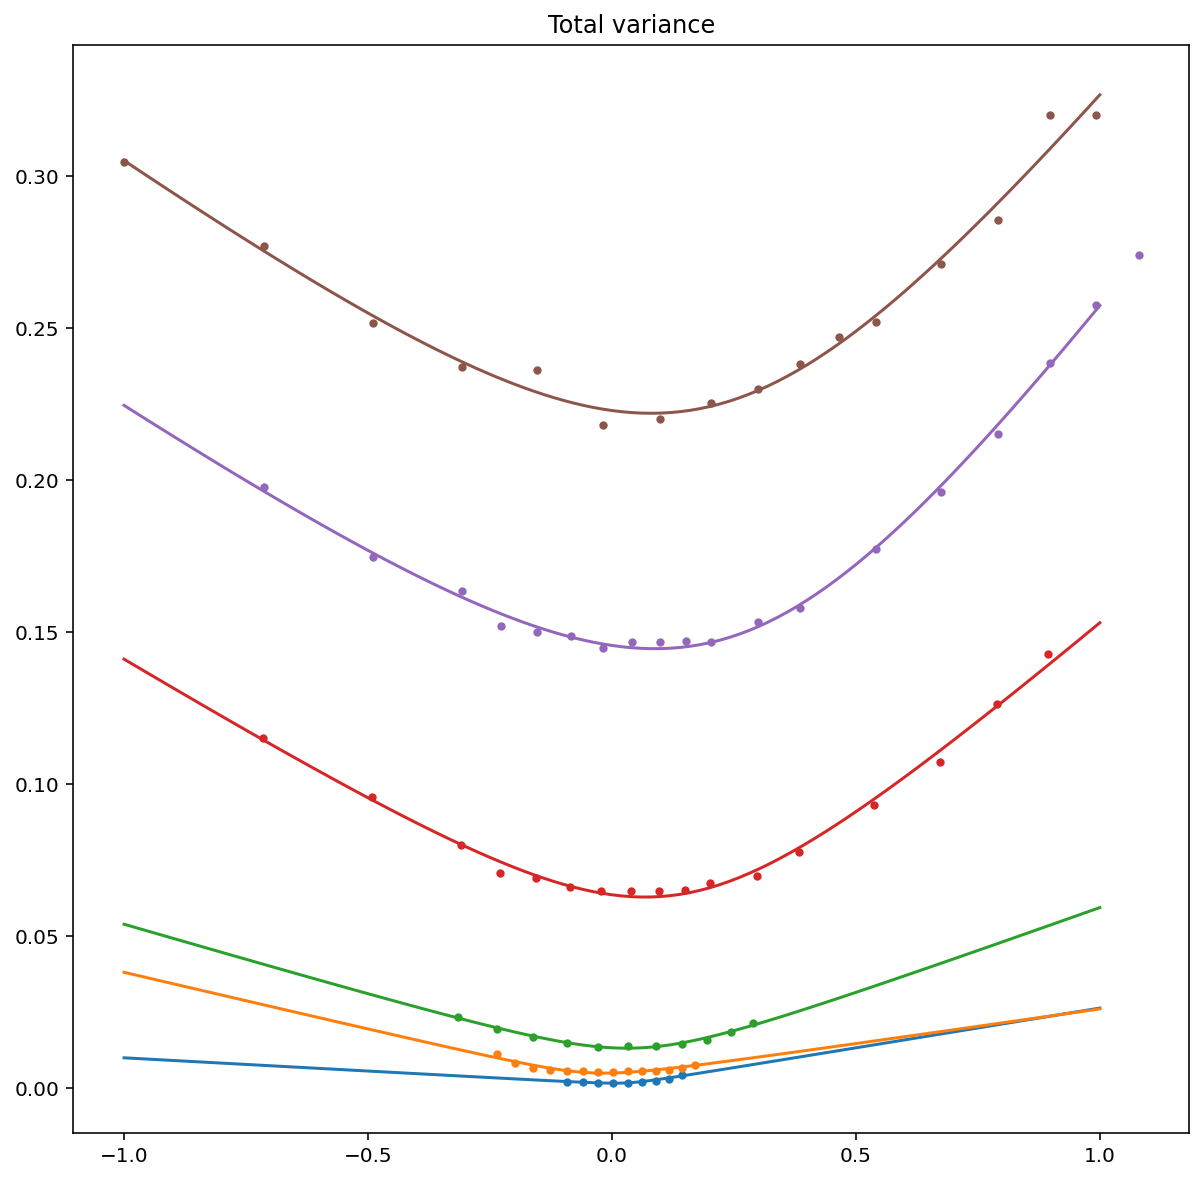

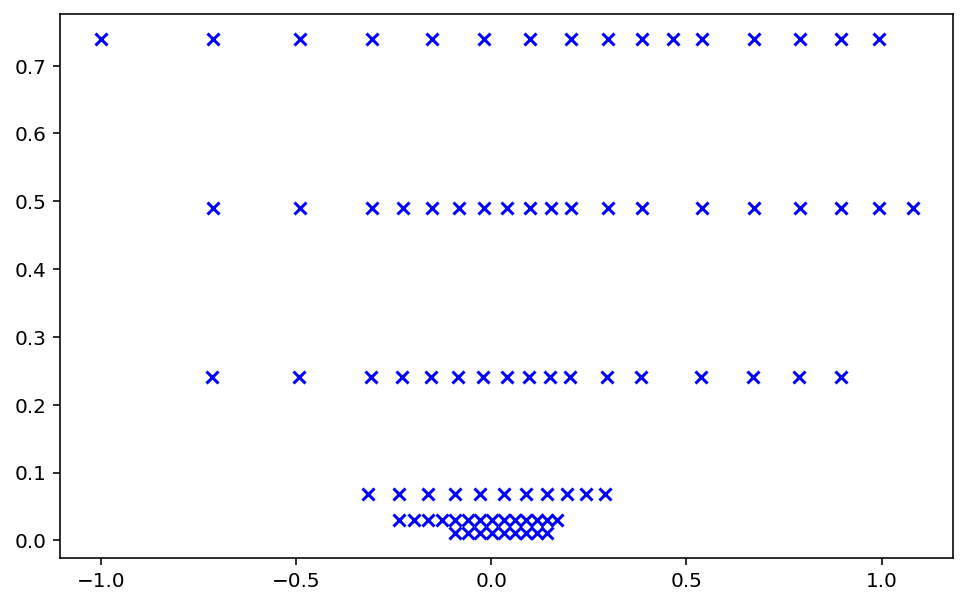

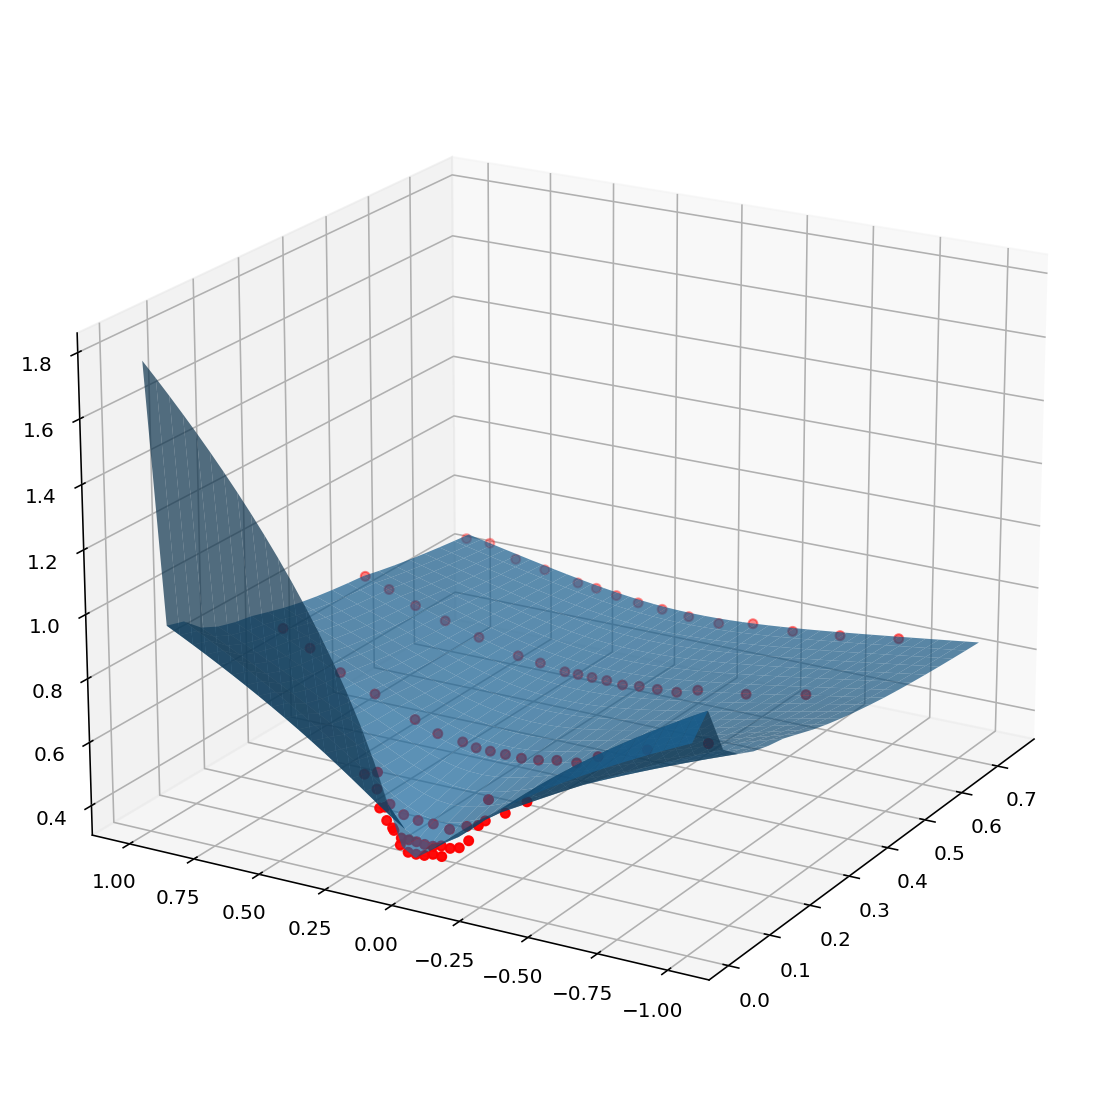

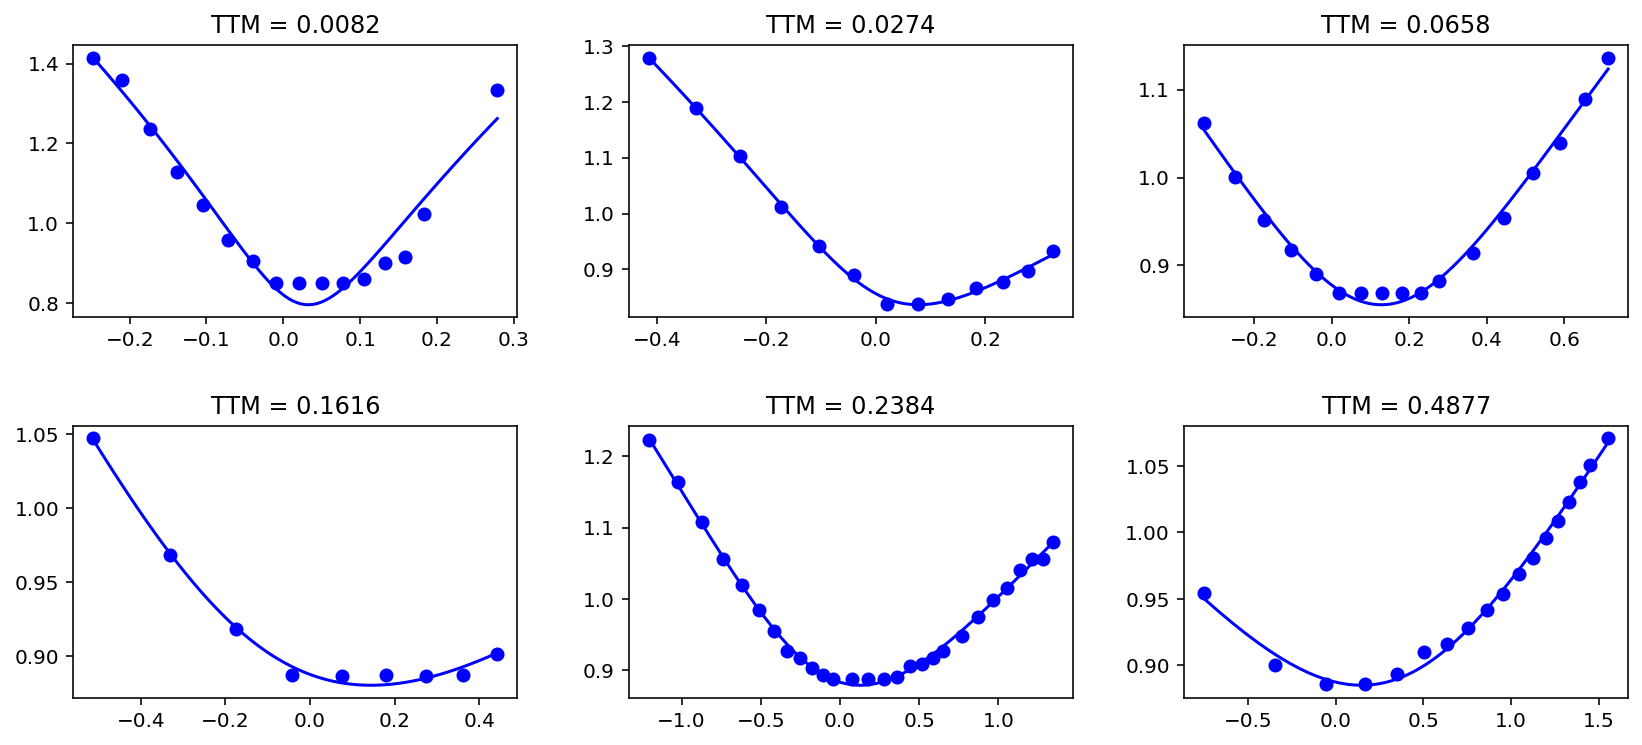

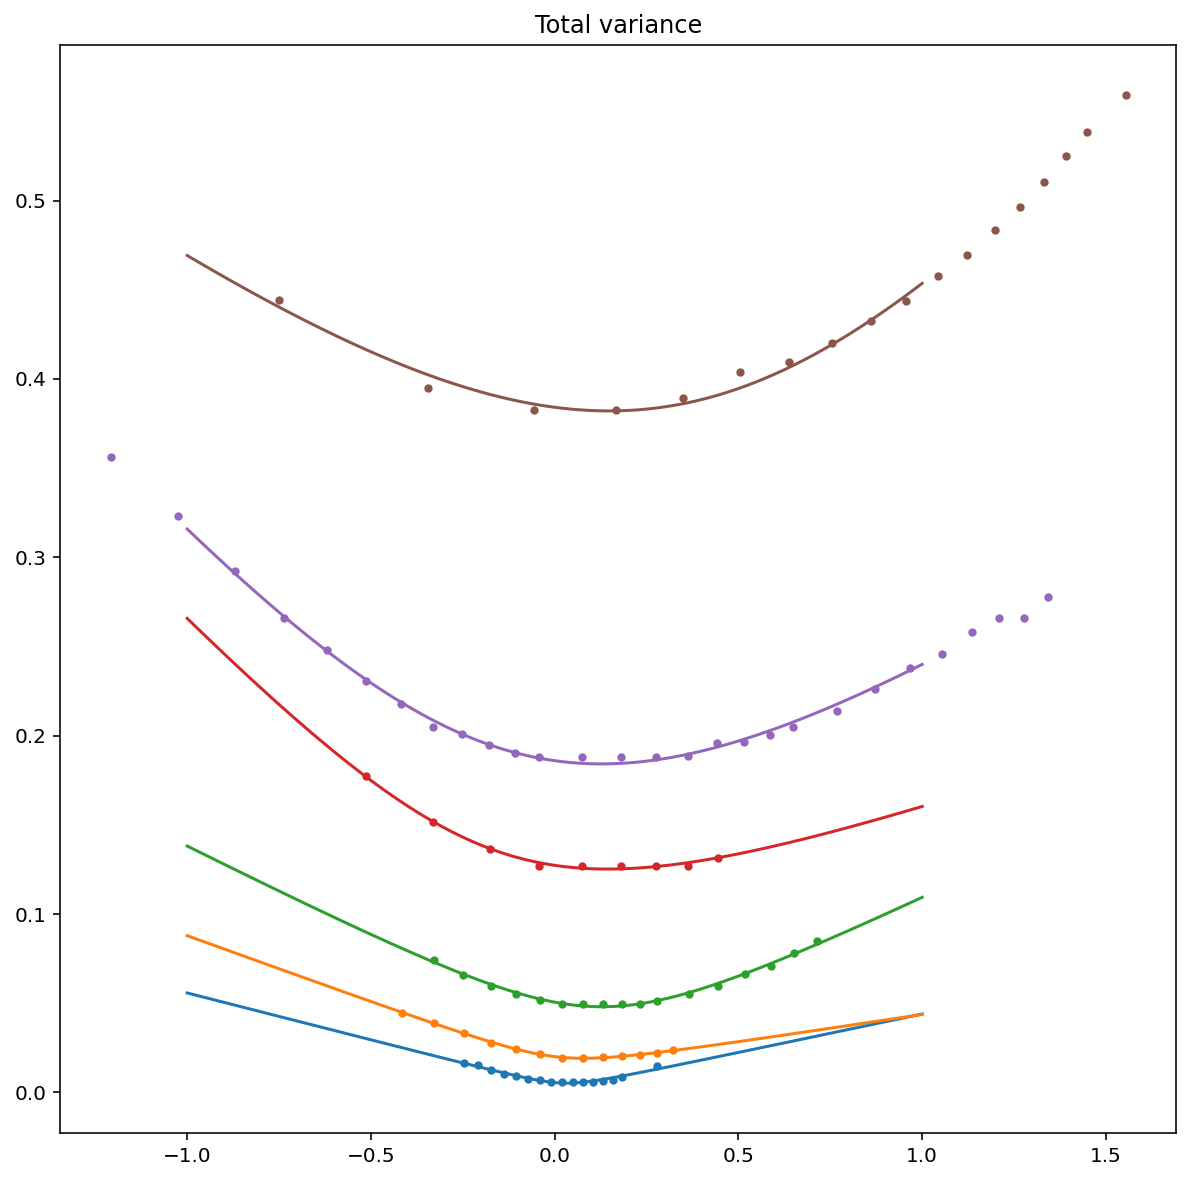

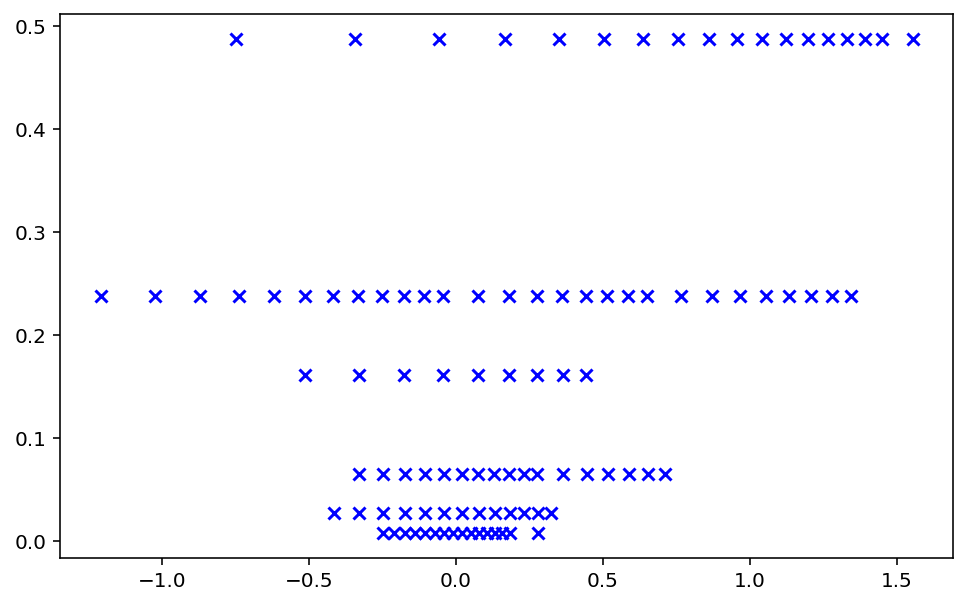

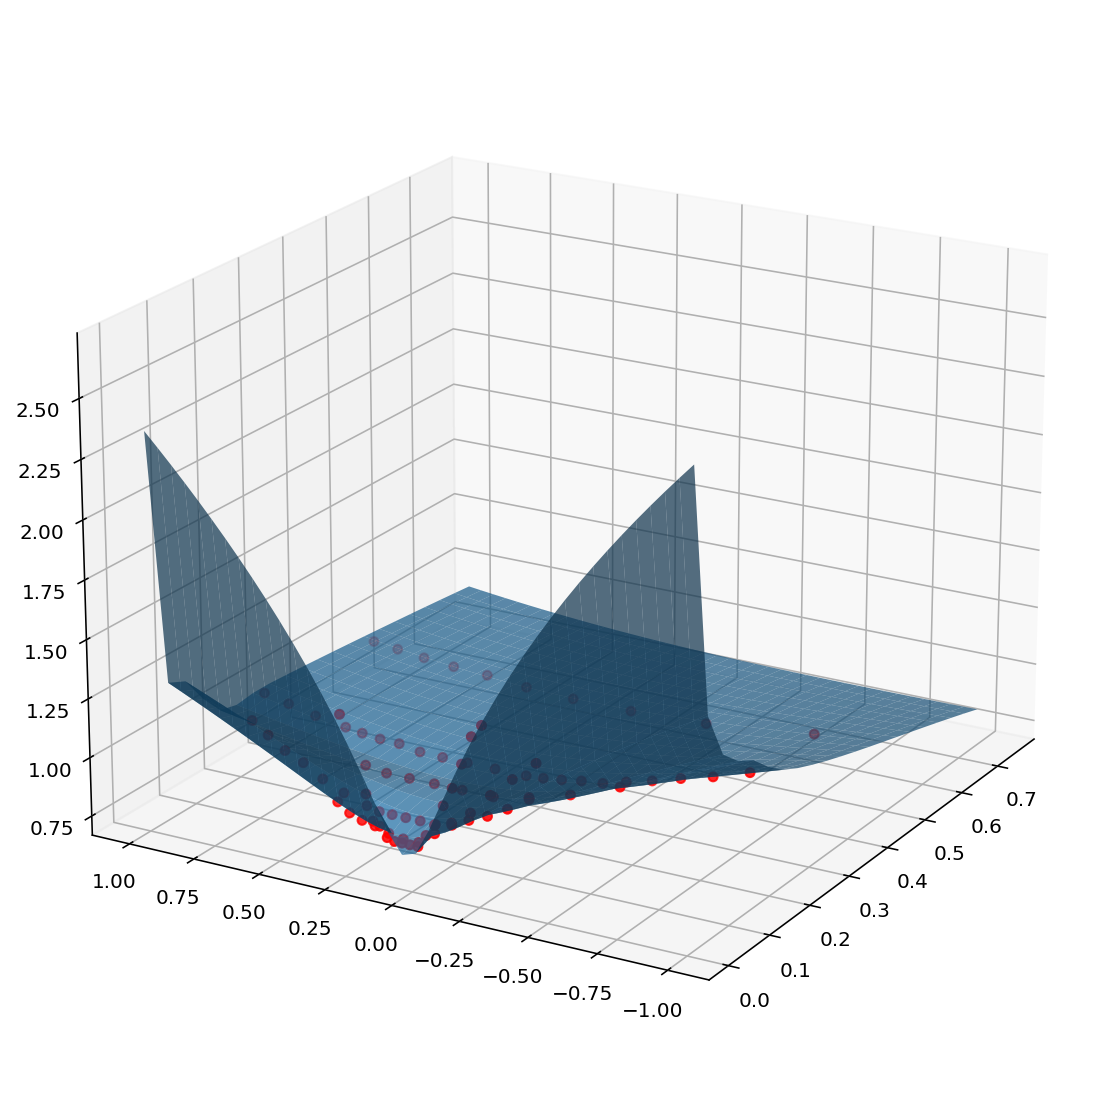

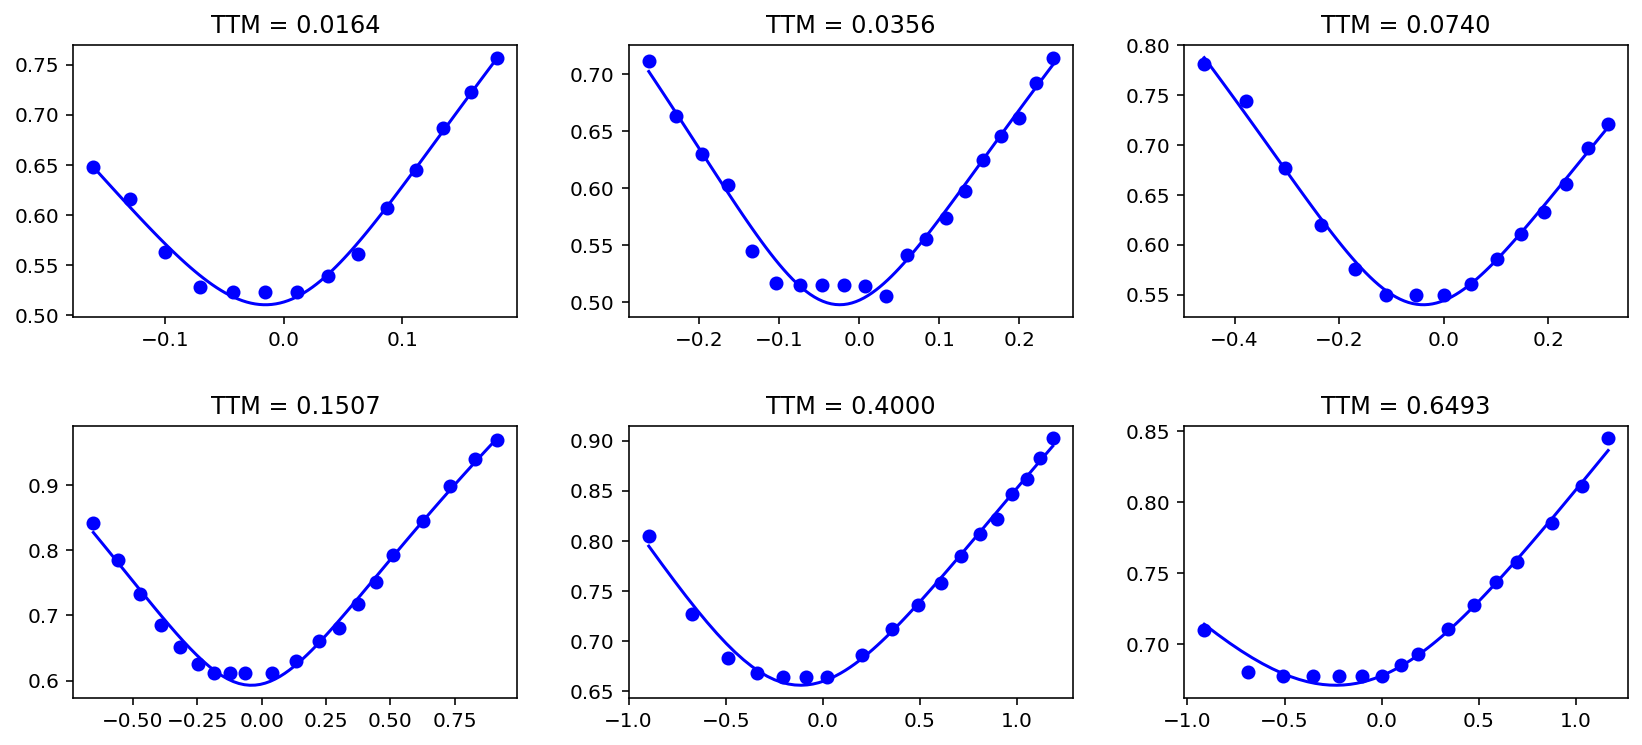

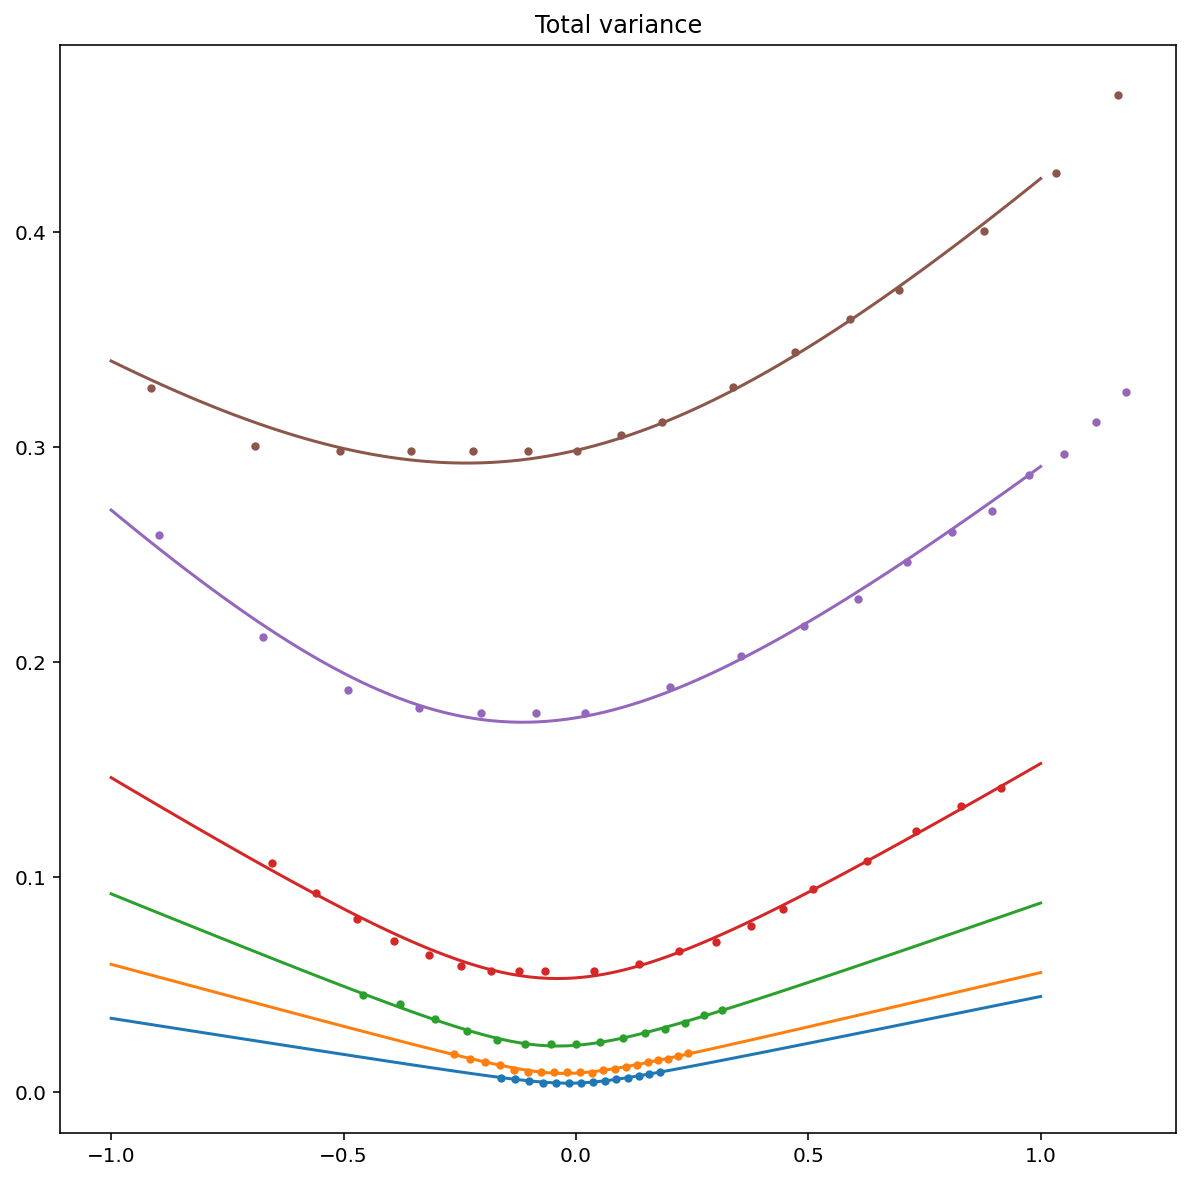

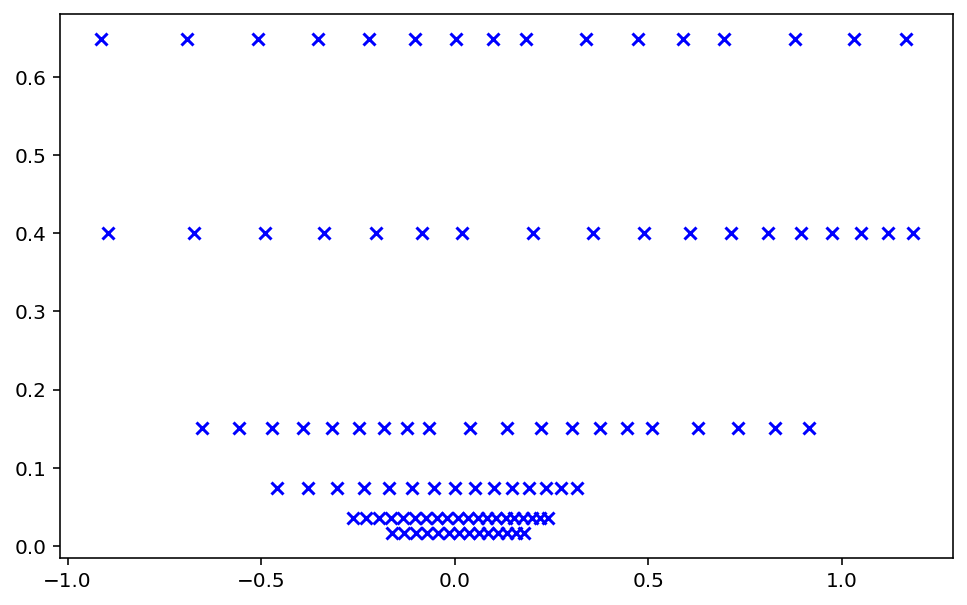

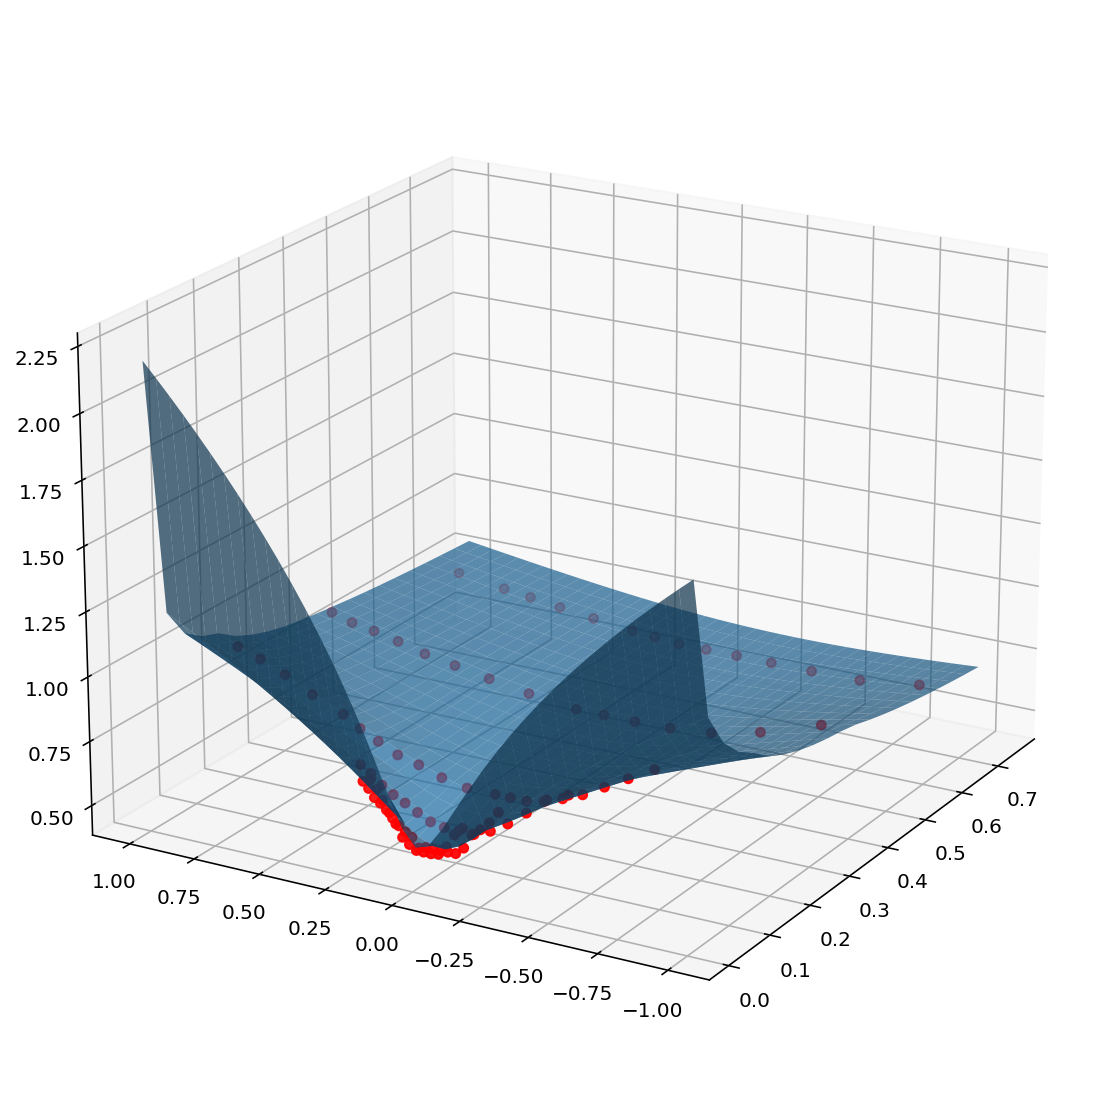

In [4]:
entries = [
    [datetime(2019, 4, 1), "BULLISH"],
    [datetime(2019, 10, 1), "CALM"],
    [datetime(2020, 2, 1), "COVID"],
]

for date, period_name in entries:

    filters = [filter_delta(0.01)]

    vs = VolatilitySurface.from_date(date, filters=filters)
    vs.calibrate()

    _ = vs.plot()
    _ = vs.plot_total_variance()
    _ = vs.plot_points()

    # plot 3d
    
    date_str = datetime.strftime(date, '%Y%m%d')

    fig = plt.figure(figsize=(10, 10))
    ax = fig.gca(projection='3d')

    BOUND = 1.

    x, y = np.meshgrid(np.linspace(0.008, 0.75, 21), np.exp(np.linspace(-BOUND, BOUND, 41)))
    z = vs.iv(x, y)

    # ax.set_title(f"DATE = {date_str}, PERIOD = {period_name}")
    
    ax.view_init(azim=210, elev=20)
    ax.plot_surface(x, np.log(y), z, linewidth=0.2, antialiased=True, alpha=0.7)

    df = vs.data[np.abs(np.log(vs.data['moneyness'])) <= BOUND]
    ax.scatter(df['ttm'], np.log(df['moneyness']), df['iv'], c='r')

    fig.savefig(f'_output/volsurf/figures/{date_str}.pdf', bbox_inches='tight')

# Calculate IV for all paths

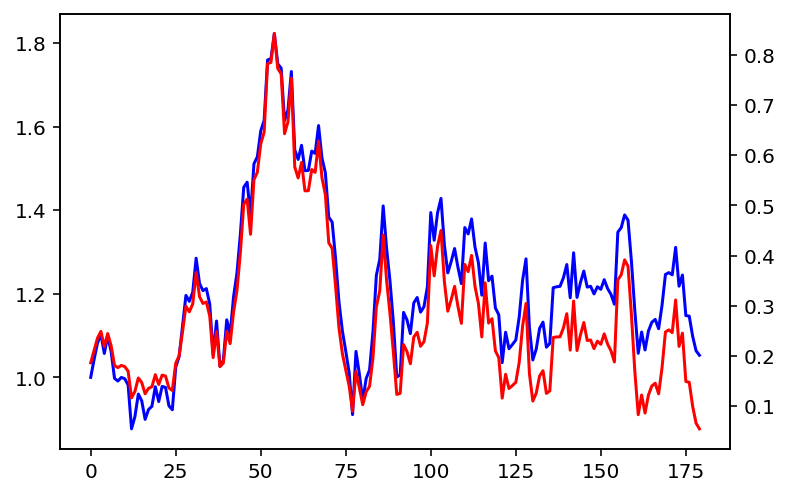

In [5]:
dt = 1/365
sigma = 1.
s0 = 1.
rate = 0.

paths = s0 * np.exp(np.cumsum(np.pad(sigma**2/2 * dt + sigma * np.sqrt(dt) * np.random.standard_normal((10000, 179)), ((0, 0), (1, 0))), axis=1))
ttm = np.linspace(180 * dt, dt, 180)
strike = 1.

iv = vs.iv(ttm, strike / paths)
calls = bs_explicit_call(ttm, strike, paths, rate, vs.iv(ttm, strike / paths))

fig, ax = plt.subplots()

idx = 0
ax.plot(paths[idx, :], c='b')
ax.twinx().plot(calls[idx, :], c='r')

# Examine SVI fits

In [6]:
fnames = [fname for fname in os.listdir("_output/volsurf/svi") if fname.endswith("csv")]
rows = []

for fname in fnames:
    df = pd.read_csv("_output/volsurf/svi/" + fname)
    items = df[['ttm', 'a', 'b', 'rho', 'm', 'sigma', 'penalty']].to_numpy()
    date = fname[:8]
    rows += [[date, *item] for item in items]
    
df = pd.DataFrame(rows, columns=['date', 'ttm', 'a', 'b', 'rho', 'm', 'sigma', 'penalty'])

In [107]:
df.sort_values('penalty', ascending=False)[:20]

,date,ttm,a,b,rho,m,sigma,penalty
1985,20200326,0.002738,0.002219,0.043481,0.041308,0.037686,0.031529,4.685392
2247,20191226,0.002738,0.000518,0.034533,-0.496273,0.002888,0.010000,2.436413
2556,20190923,0.010951,0.002829,0.059716,-0.500000,-0.009179,0.010000,2.194584
2071,20191225,0.005476,0.000645,0.052267,-0.354629,0.008594,0.010000,1.880540
2316,20190924,0.008214,0.002877,0.046954,-0.499193,-0.023267,0.010000,1.829496
1754,20200324,0.008214,0.004926,0.089566,-0.016644,0.033900,0.141449,1.564295
1387,20190627,0.002738,0.002716,0.033659,-0.500000,-0.041164,0.016192,1.282948
2351,20190529,0.005476,0.004562,0.018160,-0.002569,0.002122,0.026576,1.282344
2182,20190516,0.002738,0.002357,0.028702,-0.500000,-0.043971,0.024427,1.250338
181,20190523,0.002738,0.001861,0.028209,-0.500000,-0.033394,0.010000,1.244907


Loading volatility surface 20200326 from file.


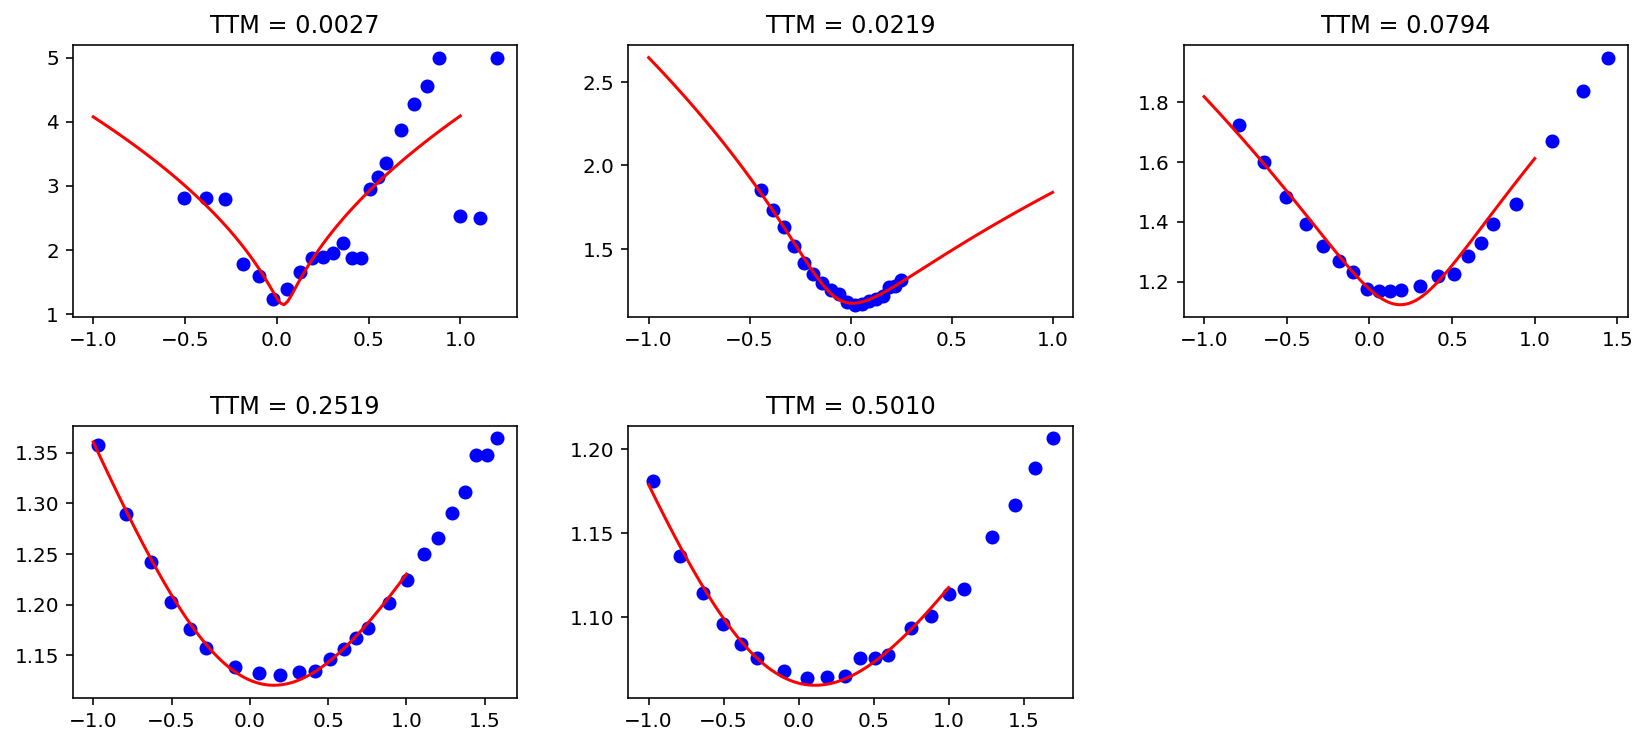

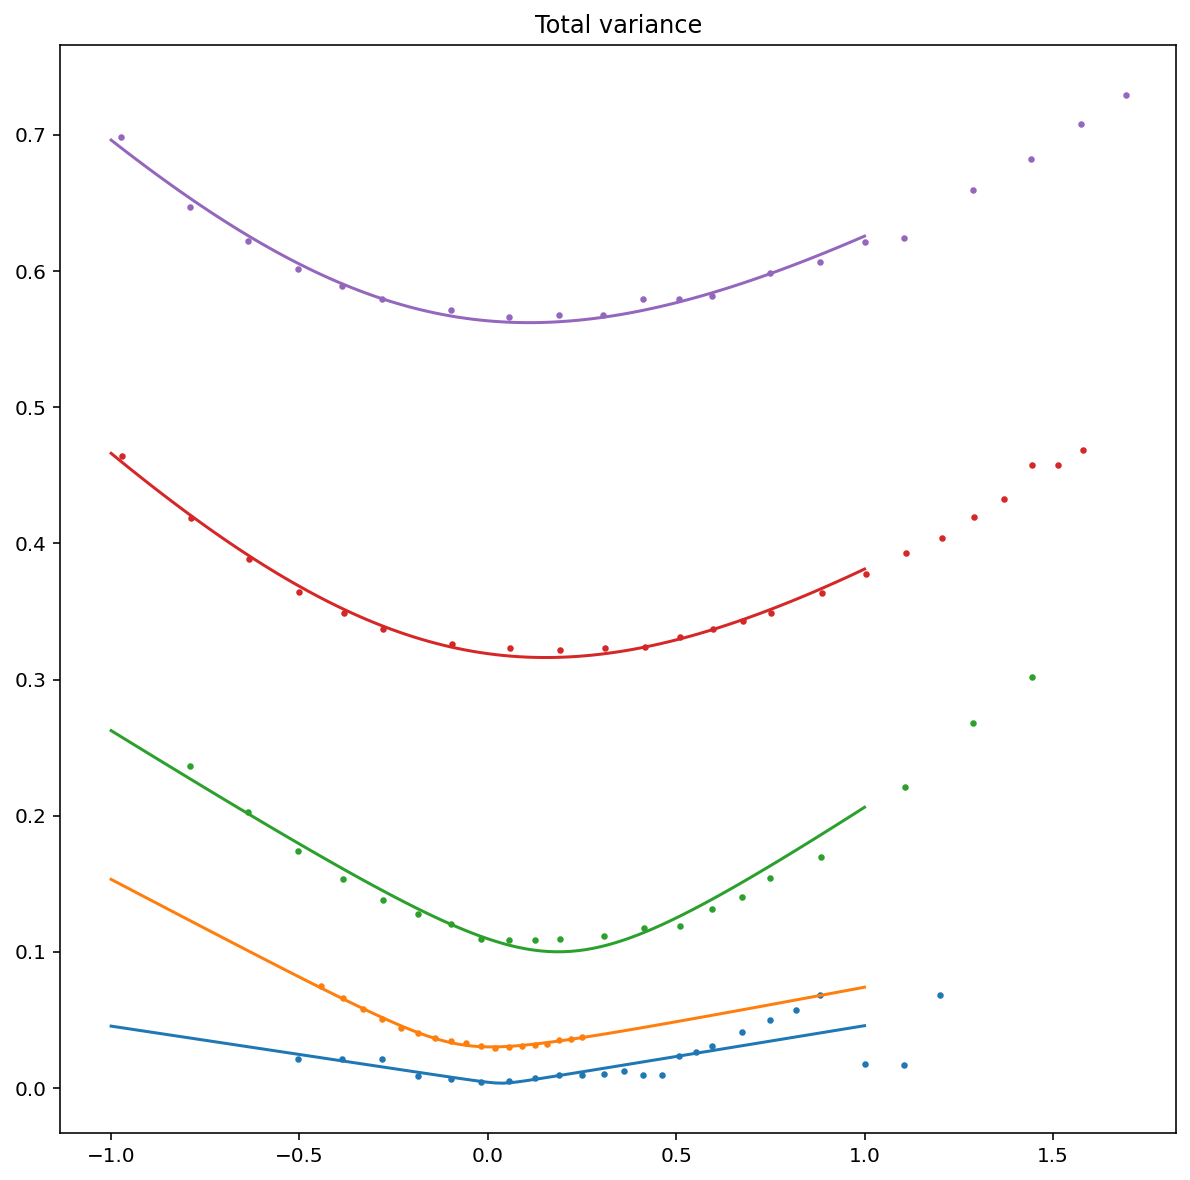

In [108]:
date = datetime.strptime("20200326", "%Y%m%d")
vs = VolatilitySurface(date)
_ = vs.plot()
_ = vs.plot_total_variance()